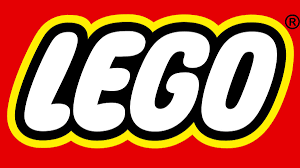

# The Lego Dataset

## 🧱 Step 1: Import Essential Libraries

In [1]:
# Import our Libraries for this project
import pandas as pd
import os
import matplotlib.pyplot as plt

--- 
## 🧱 Step 2: Load All Datasets

In [2]:
# Define the base path where all your LEGO CSV files are stored
base_path = "/Users/mj/Downloads/Lego Data"

# Load all CSVs into dataframes
colors = pd.read_csv(os.path.join(base_path, "colors.csv"))
inventories = pd.read_csv(os.path.join(base_path, "inventories.csv"))
inventory_parts = pd.read_csv(os.path.join(base_path, "inventory_parts.csv"))
inventory_sets = pd.read_csv(os.path.join(base_path, "inventory_sets.csv"))
part_categories = pd.read_csv(os.path.join(base_path, "part_categories.csv"))
parts = pd.read_csv(os.path.join(base_path, "parts.csv"))
sets = pd.read_csv(os.path.join(base_path, "sets.csv"))
themes = pd.read_csv(os.path.join(base_path, "themes.csv"))

# Display the number of rows and columns for each dataset
print("✅ Successfully Loaded All Datasets:\n")
for name, df in {
    "colors": colors,
    "inventories": inventories,
    "inventory_parts": inventory_parts,
    "inventory_sets": inventory_sets,
    "part_categories": part_categories,
    "parts": parts,
    "sets": sets,
    "themes": themes,
}.items():
    print(f"{name:<18} → {df.shape[0]:>6,} rows × {df.shape[1]} columns")

✅ Successfully Loaded All Datasets:

colors             →    135 rows × 4 columns
inventories        → 11,681 rows × 3 columns
inventory_parts    → 580,251 rows × 5 columns
inventory_sets     →  2,846 rows × 3 columns
part_categories    →     57 rows × 2 columns
parts              → 25,993 rows × 3 columns
sets               → 11,673 rows × 5 columns
themes             →    614 rows × 3 columns


---
## 🧱 Step 3: Explore the Schema

### 🔍 Understanding the Dataset Structure

The LEGO dataset comprises **eight interconnected tables**, each providing specific information. 
These tables are interconnected through **primary and foreign keys**, forming a relational schema:

1. **`colors.csv`**  
   Contains information about LEGO colors, including their IDs, names, and whether they are transparent.

2. **`inventories.csv`**  
   Lists inventory IDs and their corresponding version numbers.

3. **`inventory_parts.csv`**  
   Details the parts included in each inventory, including quantity, color, and whether the part is spare.

4. **`inventory_sets.csv`**  
   Associates inventories with specific sets.

5. **`part_categories.csv`**  
   Categorizes parts into various categories.

6. **`parts.csv`**  
   Provides details about individual parts, including part numbers and names.

7. **`sets.csv`**  
   Contains information about LEGO sets, including set numbers, names, year of release, theme IDs, and the number of parts.

8. **`themes.csv`**  
   Lists themes and their hierarchical relationships through parent IDs.

--- 
🧠 **Why this matters:**  
Understanding these relationships is essential for performing meaningful joins, merging data frames, and crafting rich analyses and visualizations later in the project.


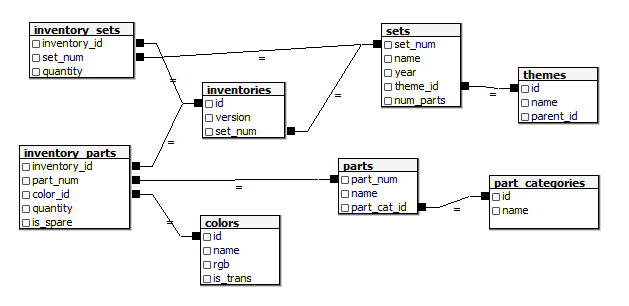

## 🧹 Step 4: Data Cleaning & Preparation

Before diving into analysis, it's critical to validate and clean the data. Here’s what we’ll cover:

- ✅ Check for **missing values** in each table
- 🧼 Inspect and cast **data types** (e.g., dates, booleans, integers)
- 🧪 Look for **duplicate rows**
- 🛠️ Identify and handle **inconsistencies** (e.g., negative quantities, unknown categories)

Let’s explore each dataset and take notes on what needs cleaning.


In [3]:
# Step 4: Data Cleaning & Preparation - Initial Diagnostics

datasets = {
    "colors": colors,
    "inventories": inventories,
    "inventory_parts": inventory_parts,
    "inventory_sets": inventory_sets,
    "part_categories": part_categories,
    "parts": parts,
    "sets": sets,
    "themes": themes,
}

def inspect_dataframe(df, name):
    print(f"📦 Dataset: {name}")
    print("-" * (10 + len(name)))
    print("Shape:", df.shape)
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicates:", df.duplicated().sum())
    print("Data Types:\n", df.dtypes)
    print("=" * 50 + "\n")

# Loop through each dataset for inspection
for name, df in datasets.items():
    inspect_dataframe(df, name)

📦 Dataset: colors
----------------
Shape: (135, 4)
Missing Values:
 id          0
name        0
rgb         0
is_trans    0
dtype: int64
Duplicates: 0
Data Types:
 id           int64
name        object
rgb         object
is_trans    object
dtype: object

📦 Dataset: inventories
---------------------
Shape: (11681, 3)
Missing Values:
 id         0
version    0
set_num    0
dtype: int64
Duplicates: 0
Data Types:
 id          int64
version     int64
set_num    object
dtype: object

📦 Dataset: inventory_parts
-------------------------
Shape: (580251, 5)
Missing Values:
 inventory_id    0
part_num        0
color_id        0
quantity        0
is_spare        0
dtype: int64
Duplicates: 0
Data Types:
 inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
dtype: object

📦 Dataset: inventory_sets
------------------------
Shape: (2846, 3)
Missing Values:
 inventory_id    0
set_num         0
quantity        0
dtype: int64
Duplicates: 0
Da

### 🛠️ Summary of Cleaning Needs

| Dataset           | Issue                      | Action                                                                 |
|------------------|----------------------------|------------------------------------------------------------------------|
| `colors`         | `is_trans` is `object`     | Convert to boolean (`True` / `False`)                                 |
| `inventory_parts`| `is_spare` is `object`     | Convert to boolean (`True` / `False`)                                 |
| `themes`         | `parent_id` has 111 nulls  | Keep as-is — null = top-level themes (expected for hierarchical data) |
| All others       | ✅ No issues                | No action needed at this stage                                        |

In [4]:
# Apply Cleaning Fixes

# Convert 'is_trans' in colors to boolean
colors["is_trans"] = colors["is_trans"].map({"t": True, "f": False})

# Convert 'is_spare' in inventory_parts to boolean
inventory_parts["is_spare"] = inventory_parts["is_spare"].map({"t": True, "f": False})

# Optional: Confirm changes
print("✅ Data cleaning complete.")
print(f"'colors.is_trans' dtype: {colors['is_trans'].dtype}")
print(f"'inventory_parts.is_spare' dtype: {inventory_parts['is_spare'].dtype}")


✅ Data cleaning complete.
'colors.is_trans' dtype: bool
'inventory_parts.is_spare' dtype: bool


### ✅ Data Cleaning Summary

After reviewing each dataset:

- `is_trans` column in `colors.csv` and `is_spare` in `inventory_parts.csv` were stored as strings ("t"/"f").
- These were successfully converted to boolean (`True`/`False`) for cleaner analysis and visualization.
- All other datasets had no missing values or datatype issues requiring intervention.
- The nulls in `themes.parent_id` are retained intentionally to preserve the theme hierarchy.

Our dataset is now fully cleaned and ready for exploration! 🎉

## 🧭 Step 5 Overview: Exploratory Data Analysis (EDA)


### 🎨 5.1: Most Common LEGO Colors

Every LEGO brick has a color — but which colors dominate the LEGO universe?

Let’s find the top 10 most frequently used colors across all sets by analyzing the `inventory_parts` table and mapping it to the `colors` table.

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/2194676910.py:15: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  plt.tight_layout()
/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


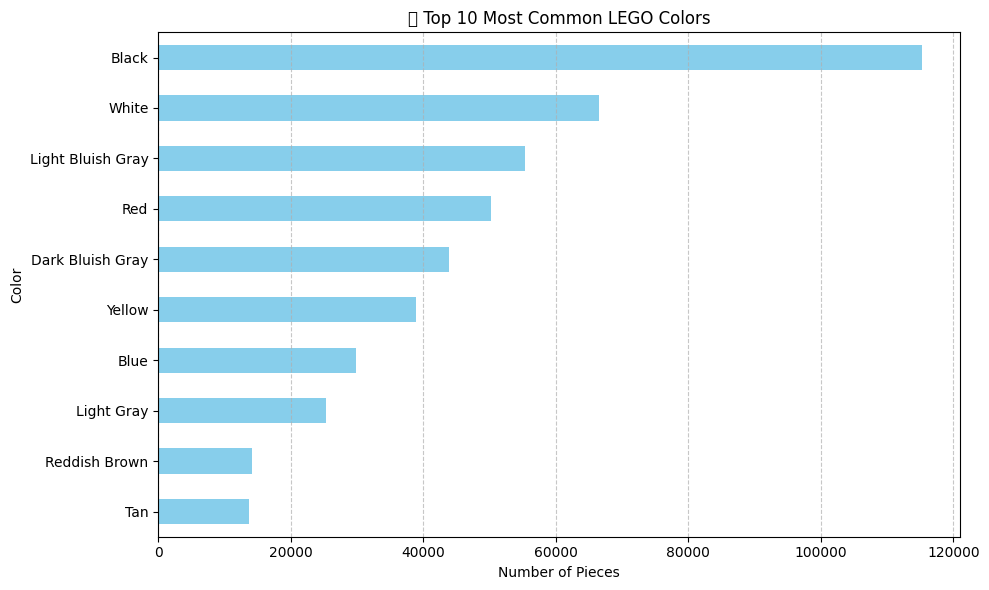

In [5]:
# Join inventory_parts with colors
color_usage = inventory_parts.merge(colors, left_on="color_id", right_on="id")

# Group by color name and count total usage
top_colors = color_usage.groupby("name").size().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
top_colors.plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()
plt.title("🎨 Top 10 Most Common LEGO Colors")
plt.xlabel("Number of Pieces")
plt.ylabel("Color")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> 🔍 **Insight:** The most popular LEGO colors are timeless classics like `Black`, `White`, and `Light Bluish Gray`, which are versatile across themes and builds — from City to Star Wars to Technic.

### 🏗️ 5.2: Top LEGO Themes by Number of Sets

LEGO has produced sets under hundreds of themes — from classic ones like City and Technic to fan-favorites like Star Wars and Harry Potter.

Let’s find which themes have had the most set releases.

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/1692682081.py:14: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from current font.
  plt.tight_layout()
/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


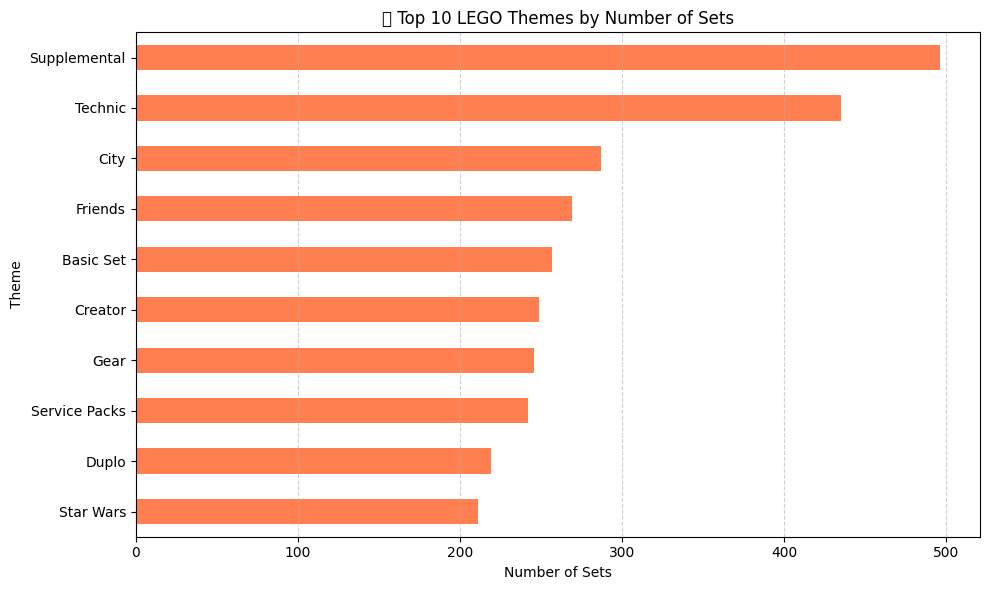

In [6]:
# Merge sets with themes to get theme names
sets_with_theme = sets.merge(themes, left_on="theme_id", right_on="id")

# Count sets per theme
top_themes = sets_with_theme["name_y"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_themes.sort_values().plot(kind="barh", color="coral")
plt.title("🏗️ Top 10 LEGO Themes by Number of Sets")
plt.xlabel("Number of Sets")
plt.ylabel("Theme")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🧩 5.3: Part Variety by Category

LEGO parts are grouped into categories like "Bricks", "Wheels", "Windows", etc.

Let’s analyze the diversity of parts in each category to see which ones dominate the LEGO universe.

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/122671839.py:14: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


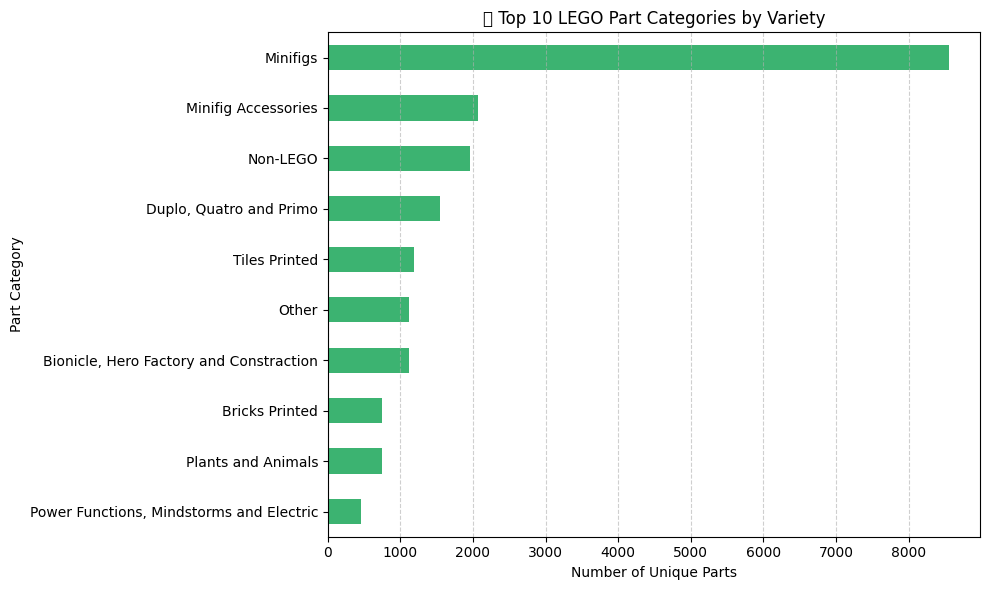

In [7]:
# Merge parts with part_categories to get category names
parts_with_category = parts.merge(part_categories, left_on="part_cat_id", right_on="id")

# Count number of unique parts in each category
top_categories = parts_with_category["name_y"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_categories.sort_values().plot(kind="barh", color="mediumseagreen")
plt.title("🧩 Top 10 LEGO Part Categories by Variety")
plt.xlabel("Number of Unique Parts")
plt.ylabel("Part Category")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📅 5.4: LEGO Sets Released Over Time

Let’s visualize how LEGO’s set production has grown over the decades. Are we in a golden age of LEGO sets?

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/1811459268.py:11: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


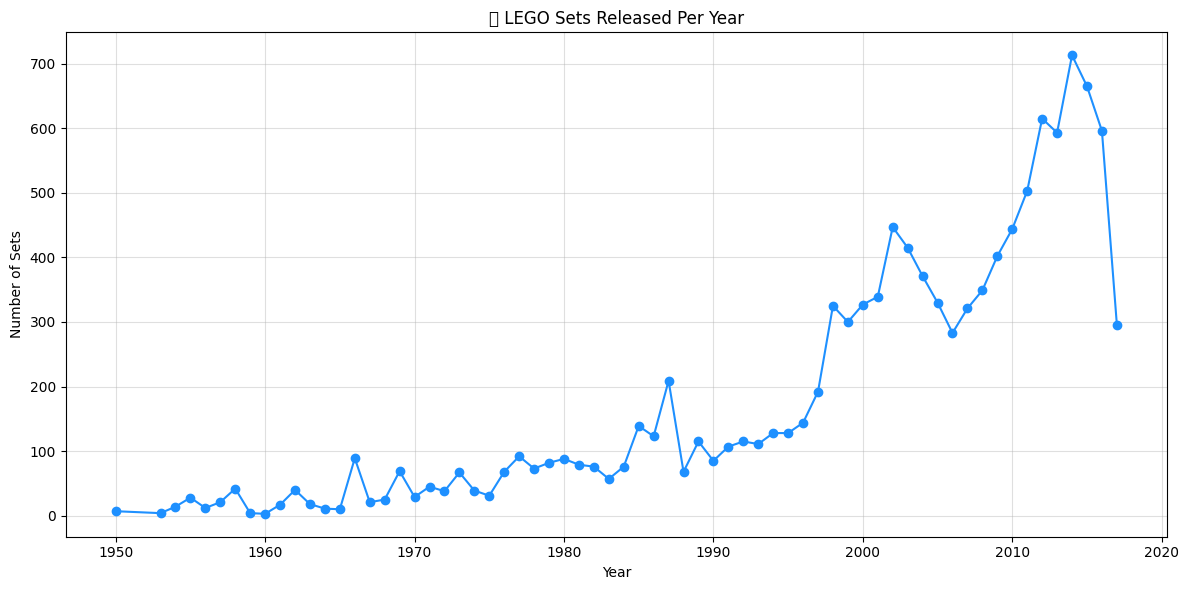

In [8]:
# Count number of sets per year
sets_per_year = sets["year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sets_per_year.plot(kind="line", marker="o", color="dodgerblue")
plt.title("📅 LEGO Sets Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

> 🚀 **Insight:** LEGO has massively scaled up its production since the early 2000s — likely fueled by the rise of licensed themes, digital instructions, and global demand.

### 🏰 5.5: Largest LEGO Sets Ever Made

Which LEGO sets pushed the boundaries in terms of sheer piece count?

Let’s explore the biggest builds ever released.

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/2286579354.py:10: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


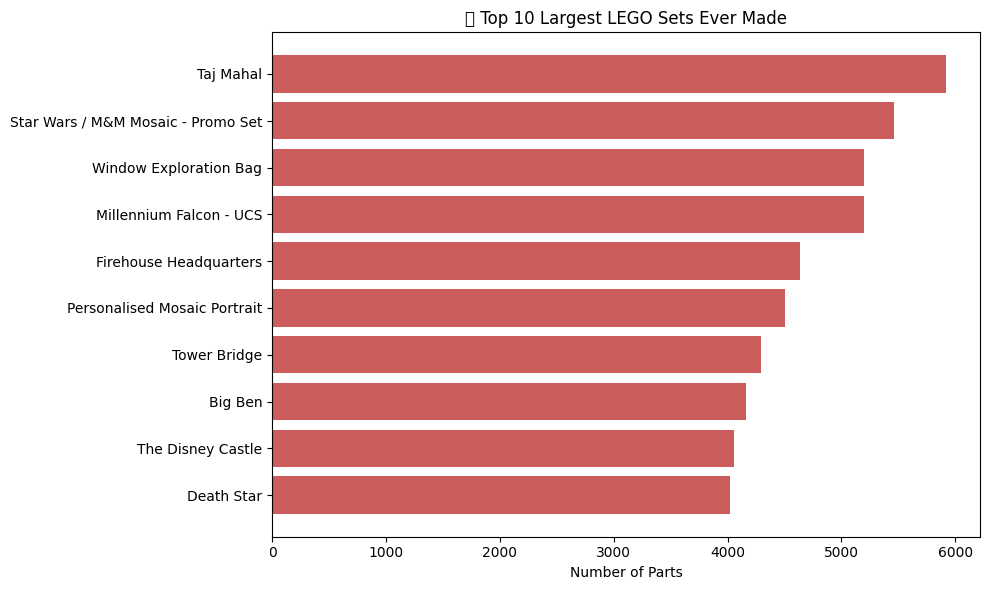

In [9]:
# Top 10 sets by number of parts
largest_sets = sets.sort_values("num_parts", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(largest_sets["name"], largest_sets["num_parts"], color="indianred")
plt.xlabel("Number of Parts")
plt.title("🏰 Top 10 Largest LEGO Sets Ever Made")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 💎 5.6: Rare or Unique LEGO Parts

Rarity makes a part special. Let's find LEGO parts that appear in only a **single inventory** — suggesting they were used just once, or in a very specific set.

In [10]:
# Count how many times each part appears in inventories
rare_parts = inventory_parts.groupby("part_num").size()
unique_parts = rare_parts[rare_parts == 1]

# Get number of unique parts used only once
print(f"💎 Number of parts used in exactly one inventory: {unique_parts.shape[0]:,}")

💎 Number of parts used in exactly one inventory: 11,724


### 📈 6.1: Theme Popularity Over Time

LEGO has released sets under hundreds of themes over the years — but how have those themes risen and fallen in popularity?

In this section, we’ll:
- Group set releases by **year and theme**
- Identify the **top 5 most popular themes of all time**
- Visualize how their popularity evolved over time using a multi-line chart

### 🧩 6.1: Clustering LEGO Sets by Complexity

To understand the diversity of LEGO set designs, we analyze how complex each set is — measured by:
- Total number of parts
- Number of unique part types
- Number of colors used

We apply **K-Means clustering** to group sets into distinct complexity profiles.

This helps identify:
- Large but repetitive sets
- Compact but intricate designs
- Broad clusters of set types (e.g. beginner kits vs advanced builds)

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load your preloaded dataframes from earlier in notebook
# (colors, inventory_parts, inventory_sets, sets, themes, inventories already in memory)

# Unique part and color count per inventory
part_counts = inventory_parts.groupby("inventory_id").agg(
    unique_parts=('part_num', 'nunique'),
    unique_colors=('color_id', 'nunique')
).reset_index()

# Map inventory_id to set_num
inv_sets = inventory_sets[['inventory_id', 'set_num']].drop_duplicates()

# Combine to build feature dataset
df = (
    inv_sets
    .merge(part_counts, on="inventory_id")
    .merge(sets[['set_num', 'name', 'theme_id', 'num_parts', 'year']], on="set_num")
    .merge(themes[['id', 'name']], left_on="theme_id", right_on="id", suffixes=("", "_theme"))
    .dropna()
)

# Prepare for clustering
X = df[['num_parts', 'unique_parts', 'unique_colors']]
X_scaled = StandardScaler().fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Interactive scatter plot
fig = px.scatter(
    df, x='num_parts', y='unique_parts',
    color='cluster',
    size='unique_colors',
    hover_data=['name', 'year', 'name_theme'],
    title="🧩 LEGO Set Complexity Clusters (Interactive)"
)
fig.show()

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/2136450132.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/jt/_r6j73g15s73ktb1fw9wryvh0000gn/T/ipykernel_45920/2136450132.py:22: UserWarning:

Glyph 128218 (\N{BOOKS}) missing from current font.

/Users/mj/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128218 (\N{BOOKS}) missing from current font.



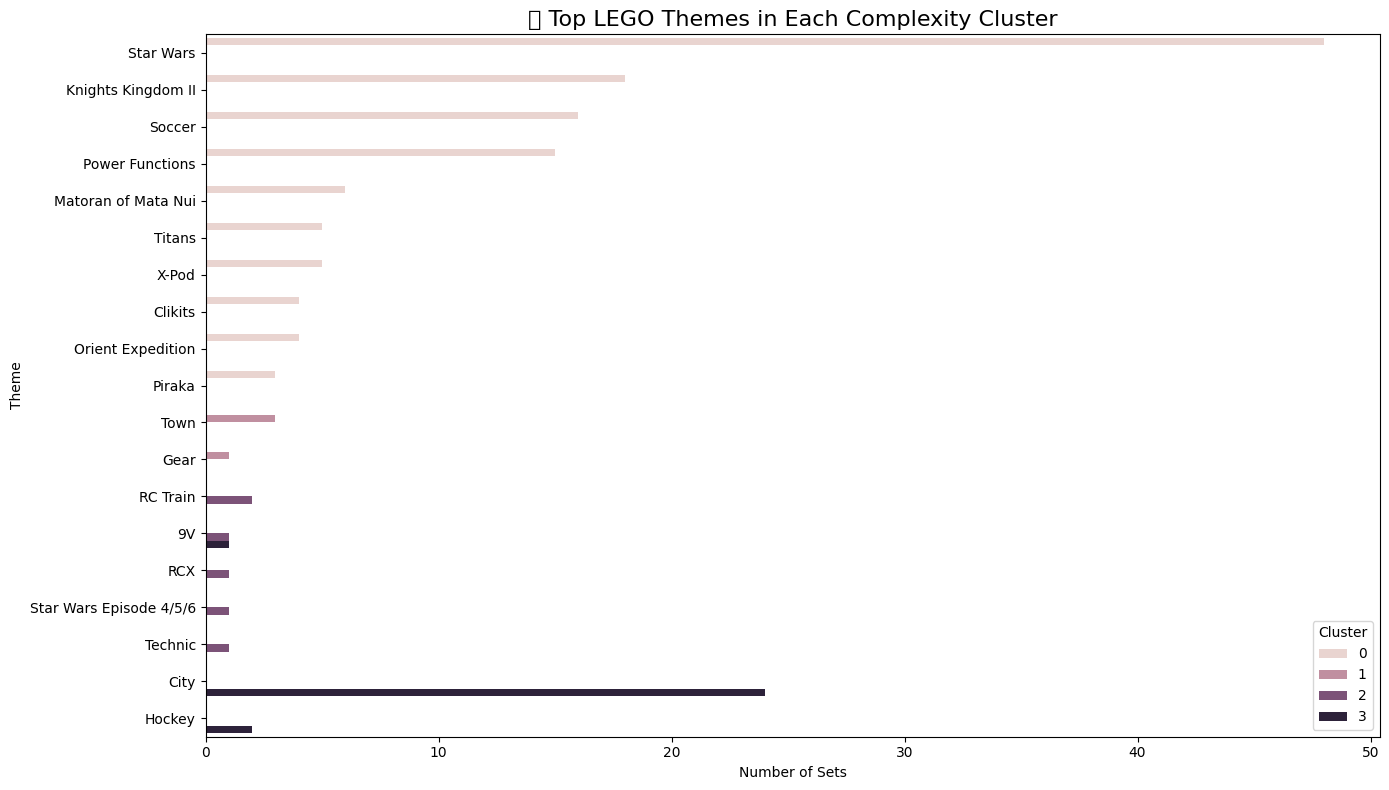

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count sets per theme per cluster
theme_cluster = (
    df.groupby(['cluster', 'name_theme'])
    .size()
    .reset_index(name='set_count')
    .sort_values(by='set_count', ascending=False)
)

# Top 10 themes per cluster (optional)
top_themes = theme_cluster.groupby('cluster').apply(lambda x: x.nlargest(10, 'set_count')).reset_index(drop=True)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_themes, x='set_count', y='name_theme', hue='cluster')
plt.title("📚 Top LEGO Themes in Each Complexity Cluster", fontsize=16)
plt.xlabel("Number of Sets")
plt.ylabel("Theme")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [16]:
famous_sets = [
    "Millennium Falcon", 
    "Hogwarts Castle", 
    "Death Star", 
    "Eiffel Tower", 
    "Titanic"
]

highlight_df = df[df["name"].str.contains("|".join(famous_sets), case=False, na=False)]

import plotly.express as px
fig = px.scatter(
    df, x='num_parts', y='unique_parts',
    color='cluster',
    size='unique_colors',
    hover_data=['name', 'year', 'name_theme'],
    title="🧩 LEGO Set Complexity Clusters"
)

# Overlay highlighted famous sets
fig.add_scatter(
    x=highlight_df['num_parts'],
    y=highlight_df['unique_parts'],
    mode='markers+text',
    text=highlight_df['name'],
    marker=dict(color='black', size=12, symbol='star'),
    name='Famous Sets'
)
fig.show()


In [20]:
import plotly.express as px
import pandas as pd

# Step 1: Total quantity of parts per color
color_totals = (
    inventory_parts
    .merge(colors, left_on="color_id", right_on="id")
    .groupby(['name', 'rgb'])
    .agg(total_quantity=('quantity', 'sum'))
    .reset_index()
)

# Step 2: Format color as hex for Plotly
color_totals["hex"] = "#" + color_totals["rgb"]

# Step 3: Sort colors for a nice horizontal layout
color_totals = color_totals.sort_values(by="total_quantity", ascending=False)

# Step 4: Create horizontal bubble chart
fig = px.scatter(
    color_totals,
    x="name",
    y="total_quantity",
    size="total_quantity",
    color="hex",
    hover_name="name",
    title="🎨 LEGO Color Usage by Quantity (Bubble Chart)",
    color_discrete_map="identity",  # Use hex color values directly
)

fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(
    xaxis_title="Color Name",
    yaxis_title="Total Quantity of Parts",
    showlegend=False,
    height=600
)

fig.show()
